   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

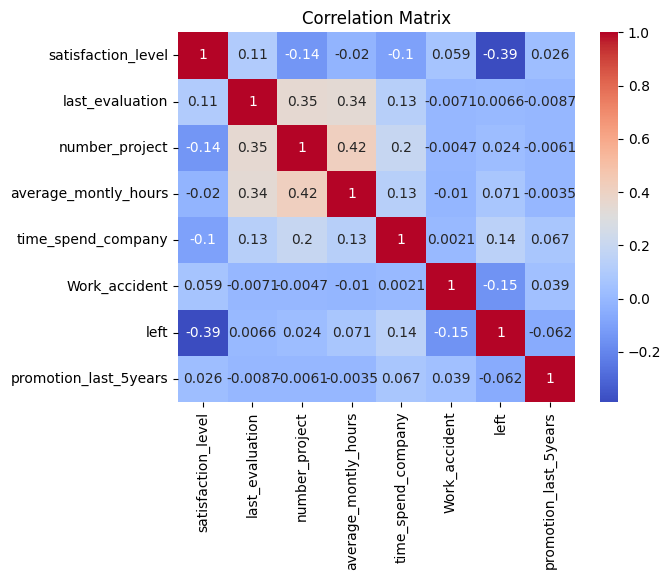

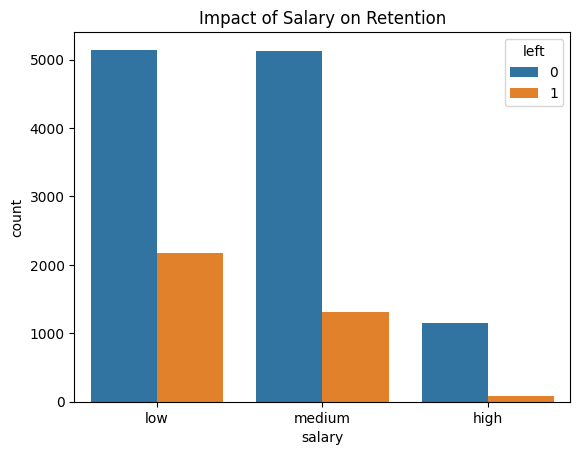

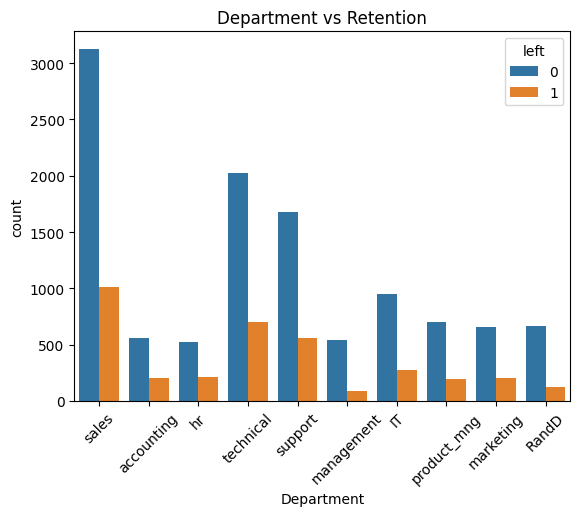

Model Accuracy: 0.76


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
df = pd.read_csv("HR_comma_sep.csv")

# Step 2: Exploratory Data Analysis
print(df.head())
print(df.info())
print(df['left'].value_counts())

# Correlation heatmap
# Only include numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Salary vs Retention
sns.countplot(x='salary', hue='left', data=df)
plt.title("Impact of Salary on Retention")
plt.show()

# Department vs Retention
sns.countplot(x='Department', hue='left', data=df)
plt.xticks(rotation=45)
plt.title("Department vs Retention")
plt.show()

# Step 3: Data Preprocessing
df_processed = df.copy()
le = LabelEncoder()
df_processed['salary'] = le.fit_transform(df_processed['salary'])
df_processed['Department'] = le.fit_transform(df_processed['Department'])

# Features selected based on correlation and EDA
features = ['satisfaction_level', 'last_evaluation', 'number_project',
            'average_montly_hours', 'time_spend_company',
            'Work_accident', 'promotion_last_5years',
            'salary', 'Department']
X = df_processed[features]
y = df_processed['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

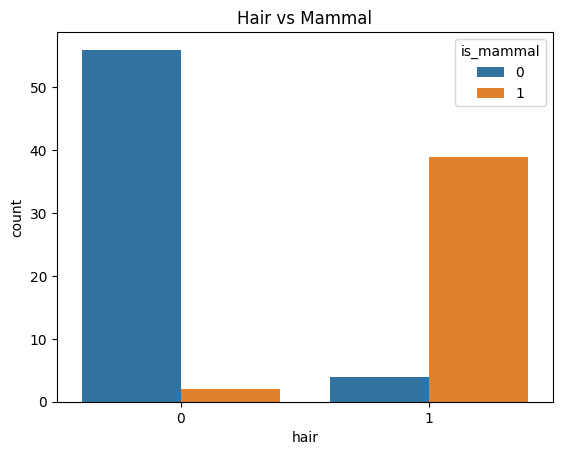

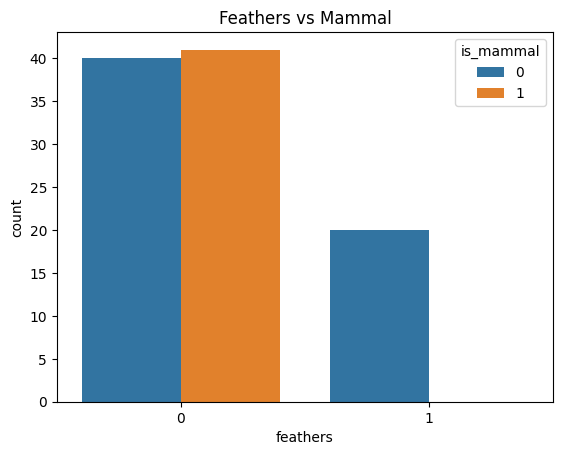


Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         7

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load data
zoo_df = pd.read_csv('zoo-data.csv')
class_df = pd.read_csv('zoo-class-type.csv')

# Merge if needed – but zoo_df already has class_type
print(zoo_df.head())
print(zoo_df['class_type'].value_counts())

# Step 2: Create binary classification target: mammal (1) vs not (0)
zoo_df['is_mammal'] = (zoo_df['class_type'] == 1).astype(int)

# Step 3: Exploratory Data Analysis
# Example: hair and feathers vs mammal
sns.countplot(x='hair', hue='is_mammal', data=zoo_df)
plt.title("Hair vs Mammal")
plt.show()

sns.countplot(x='feathers', hue='is_mammal', data=zoo_df)
plt.title("Feathers vs Mammal")
plt.show()

# Step 4: Prepare features and target
X = zoo_df.drop(columns=['animal_name', 'class_type', 'is_mammal'])
y = zoo_df['is_mammal']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 6: Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
